# Rice Leaf Disease Classification

Rice Leaf Disease Detection
Business Case: This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in Bacterial Leaf Blight,Brown Spot and Leaf Smut.

Classes
1. Leaf smut
2. Brown spot
3. Bacterial leaf blight

Rice is amongst the majorly cultivated crops in India and its leaf diseases can have a substantial impact on output and quality. The most important component is identifying rice leaf diseases, which have a direct impact on the economy and food security. Brown spot, Leaf Smut, Bacterial Leaf Blight are the most frequently occurring rice leaf diseases. To resolve this issue, we have studied various machine learning and deep learning approaches for detecting the diseases on their leaves by calculating their accuracy, recall, and precision to measure the performance. This study helps the farmers by detecting the diseases in rice leaves in order to get a healthy crop yield. The deep learning models perform well when compared with the machine learning methods.

**Task 1:-Prepare a complete data analysis report on the given data.**

Here, we are importing the required essential libraries.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-leaf-diseases.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


print(tf.__version__)

2.15.0


# Loading Dataset

In [ ]:
dataset = {
             "data" : "/content/rice_leaf_diseases"
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)


    all_data.append(data.copy())
    data.clear()

In [ ]:
df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))

In [ ]:
df

,imgpath,labels
0,/content/rice_leaf_diseases/Leaf smut/DSC_0506...,Leaf smut
1,/content/rice_leaf_diseases/Leaf smut/DSC_0308...,Leaf smut
2,/content/rice_leaf_diseases/Leaf smut/DSC_0313...,Leaf smut
3,/content/rice_leaf_diseases/Leaf smut/DSC_0338...,Leaf smut
4,/content/rice_leaf_diseases/Leaf smut/DSC_0511...,Leaf smut
...,...,...
115,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight
116,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight
117,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight
118,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight


In [ ]:
df['labels'].value_counts()

Leaf smut                40
Brown spot               40
Bacterial leaf blight    40
Name: labels, dtype: int64

In [ ]:
print("Total number of Labels: ",df['labels'].nunique())
print("List of all Labels:", df['labels'].unique())

Total number of Labels:  3
List of all Labels: ['Leaf smut' 'Brown spot' 'Bacterial leaf blight']


In [ ]:
#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [ ]:
df

,imgpath,labels,encoded_labels
0,/content/rice_leaf_diseases/Leaf smut/DSC_0506...,Leaf smut,2
1,/content/rice_leaf_diseases/Leaf smut/DSC_0308...,Leaf smut,2
2,/content/rice_leaf_diseases/Leaf smut/DSC_0313...,Leaf smut,2
3,/content/rice_leaf_diseases/Leaf smut/DSC_0338...,Leaf smut,2
4,/content/rice_leaf_diseases/Leaf smut/DSC_0511...,Leaf smut,2
...,...,...,...
115,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
116,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
117,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
118,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0


In [ ]:
train_df , test_df = train_test_split(df ,  train_size= 0.80 , shuffle=True,stratify=df['encoded_labels'], random_state=124)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [ ]:
train_df

,imgpath,labels,encoded_labels
0,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
1,/content/rice_leaf_diseases/Brown spot/DSC_010...,Brown spot,1
2,/content/rice_leaf_diseases/Brown spot/DSC_011...,Brown spot,1
3,/content/rice_leaf_diseases/Brown spot/DSC_030...,Brown spot,1
4,/content/rice_leaf_diseases/Leaf smut/DSC_0327...,Leaf smut,2
...,...,...,...
91,/content/rice_leaf_diseases/Leaf smut/DSC_0322...,Leaf smut,2
92,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
93,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
94,/content/rice_leaf_diseases/Brown spot/DSC_030...,Brown spot,1


In [ ]:
test_df

,imgpath,labels,encoded_labels
0,/content/rice_leaf_diseases/Leaf smut/DSC_0321...,Leaf smut,2
1,/content/rice_leaf_diseases/Brown spot/DSC_030...,Brown spot,1
2,/content/rice_leaf_diseases/Leaf smut/DSC_0511...,Leaf smut,2
3,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
4,/content/rice_leaf_diseases/Leaf smut/DSC_0335...,Leaf smut,2
5,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
6,/content/rice_leaf_diseases/Leaf smut/DSC_0500...,Leaf smut,2
7,/content/rice_leaf_diseases/Bacterial leaf bli...,Bacterial leaf blight,0
8,/content/rice_leaf_diseases/Brown spot/DSC_032...,Brown spot,1
9,/content/rice_leaf_diseases/Leaf smut/DSC_0512...,Leaf smut,2


In [ ]:
train_df['labels'].value_counts()

Bacterial leaf blight    32
Brown spot               32
Leaf smut                32
Name: labels, dtype: int64

In [ ]:
test_df['labels'].value_counts()

Leaf smut                8
Brown spot               8
Bacterial leaf blight    8
Name: labels, dtype: int64

# Training Data images count per class

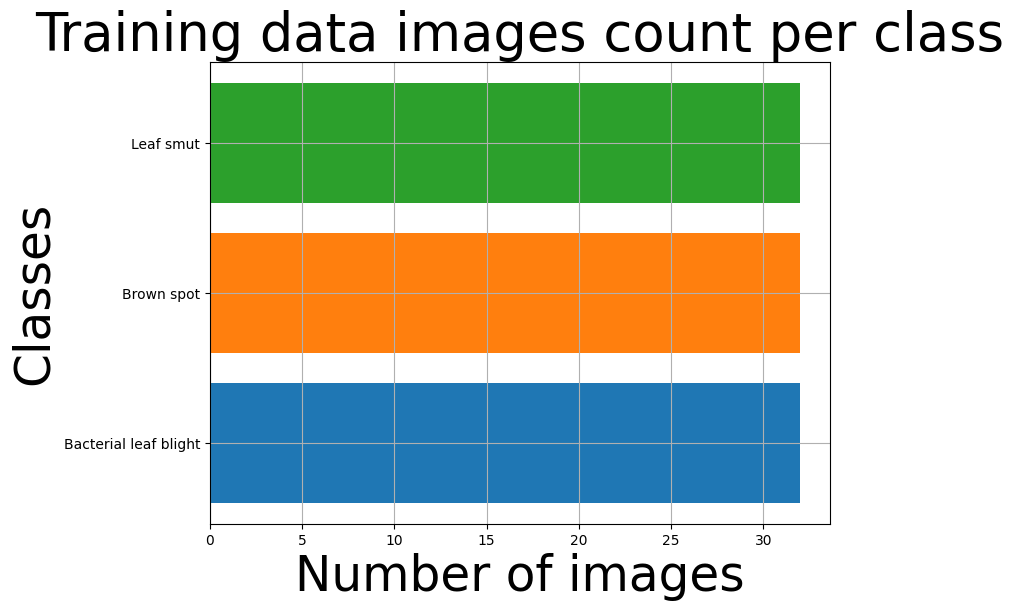

In [ ]:
train  = train_df["labels"].value_counts()
label = train.tolist()
index = train.index.tolist()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c"
]

plt.figure(figsize=(8,6))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index,label, color=colors)
plt.grid(True)
plt.show()

# Showing sample from data

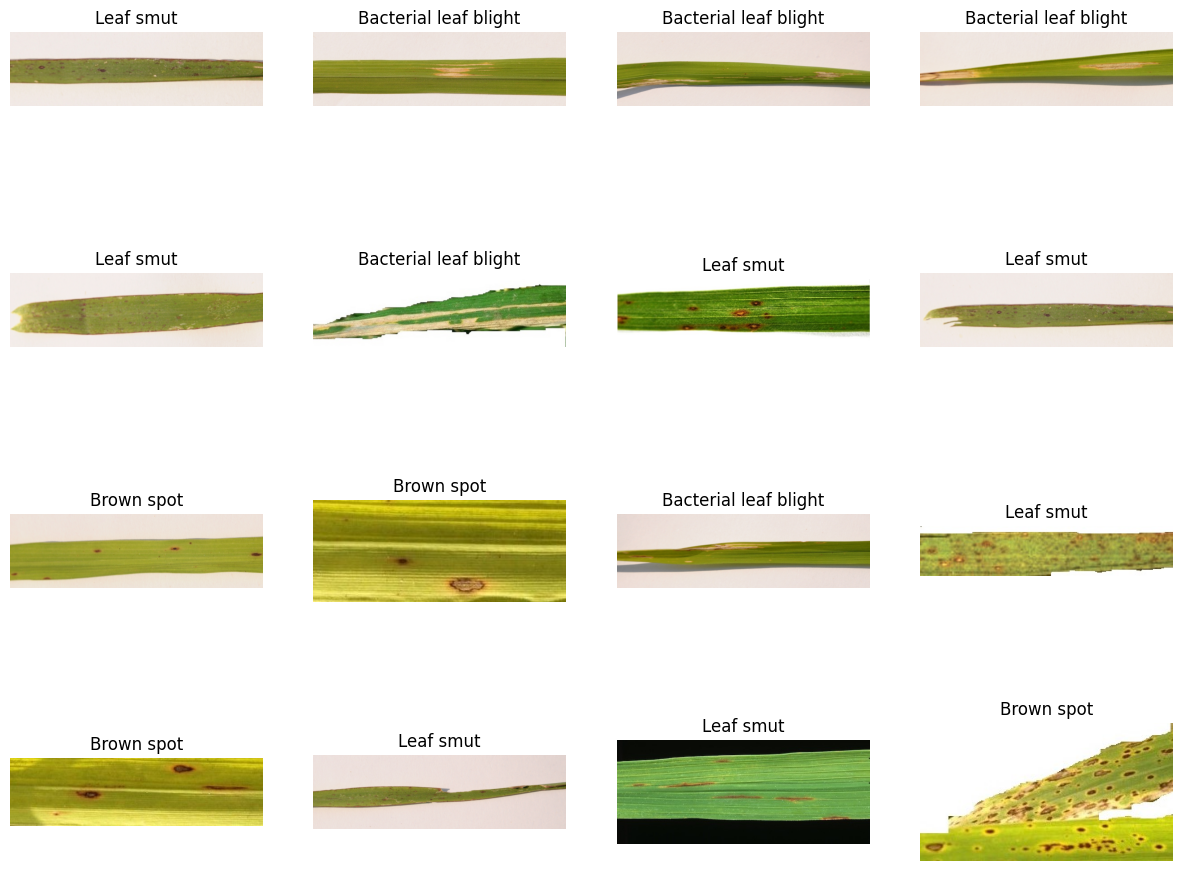

In [ ]:
plt.figure(figsize=(15,12))
for i, row in df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

# Creating Dataloaders

In [ ]:
%%time

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)



valid_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 96 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.
CPU times: user 14.2 ms, sys: 1.17 ms, total: 15.4 ms
Wall time: 25.2 ms


# Model Structure

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


# Assuming 'base_model' is your pre-trained model

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Add Batch Normalization
x = Dropout(0.5)(x)  # Add dropout with a rate of 0.5
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)  # Add Batch Normalization
x = Dropout(0.5)(x)  # Add dropout with a rate of 0.5
predictions = Dense(3, activation='softmax')(x)  # Adjust num_classes to match your dataset



# Create a new model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])









In [ ]:
history = model.fit(
    train_images,
    epochs=20,
    validation_data=valid_images)

Epoch 1/20
3/3 [==============================] - 5s 808ms/step - loss: 1.5859 - accuracy: 0.4375 - val_loss: 5.4961 - val_accuracy: 0.5417
Epoch 2/20
3/3 [==============================] - 2s 731ms/step - loss: 0.8532 - accuracy: 0.6979 - val_loss: 4.6211 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 3s 911ms/step - loss: 0.7301 - accuracy: 0.7083 - val_loss: 3.0020 - val_accuracy: 0.5417
Epoch 4/20
3/3 [==============================] - 2s 586ms/step - loss: 0.5661 - accuracy: 0.8333 - val_loss: 1.8799 - val_accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 2s 567ms/step - loss: 0.4635 - accuracy: 0.8229 - val_loss: 1.2158 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 2s 560ms/step - loss: 0.4369 - accuracy: 0.8646 - val_loss: 0.9634 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 2s 721ms/step - loss: 0.3908 - accuracy: 0.8438 - val_loss: 0.8125 - val_accuracy: 0.7083
Epoch 8/20
3/3 [====

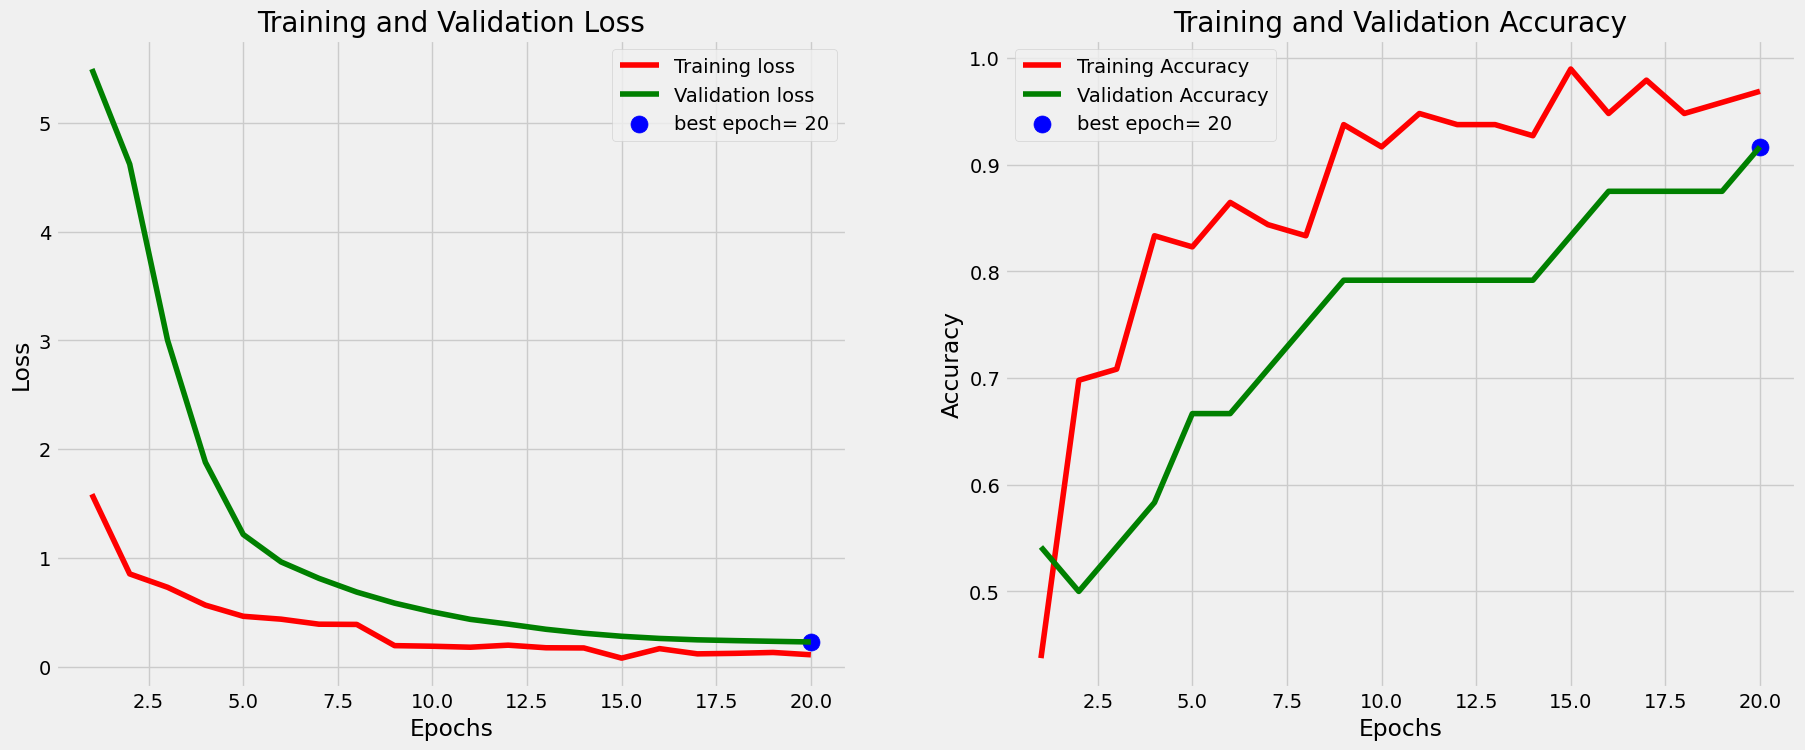

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
results = model.evaluate(valid_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.22717
Test Accuracy: 91.67%


# CLASSIFICATION REPORT (F1 Score / Recall / Precision)

In [ ]:
y_true = valid_images.classes
y_pred = np.argmax(model.predict(valid_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=valid_images.class_indices.keys()))

1/1 [==============================] - 1s 520ms/step
F1 Score: 0.9153439153439153
                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         8
           Brown spot       0.80      1.00      0.89         8
            Leaf smut       1.00      0.75      0.86         8

             accuracy                           0.92        24
            macro avg       0.93      0.92      0.92        24
         weighted avg       0.93      0.92      0.92        24



In [ ]:
classes = dict(zip(valid_images.class_indices.values(), valid_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(valid_images.labels))),
                            "Test Labels" : valid_images.labels,
                            "Test Classes" : [classes[i] for i in valid_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": valid_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(valid_images), axis = 1))]
                           })
Predictions.head(10)

1/1 [==============================] - 0s 290ms/step


,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
0,0,2,Leaf smut,2,Leaf smut,/content/rice_leaf_diseases/Leaf smut/DSC_0321...,0.868652
1,1,1,Brown spot,1,Brown spot,/content/rice_leaf_diseases/Brown spot/DSC_030...,0.999023
2,2,2,Leaf smut,1,Brown spot,/content/rice_leaf_diseases/Leaf smut/DSC_0511...,0.791016
3,3,0,Bacterial leaf blight,0,Bacterial leaf blight,/content/rice_leaf_diseases/Bacterial leaf bli...,0.799805
4,4,2,Leaf smut,1,Brown spot,/content/rice_leaf_diseases/Leaf smut/DSC_0335...,0.569824
5,5,0,Bacterial leaf blight,0,Bacterial leaf blight,/content/rice_leaf_diseases/Bacterial leaf bli...,0.999023
6,6,2,Leaf smut,2,Leaf smut,/content/rice_leaf_diseases/Leaf smut/DSC_0500...,0.529297
7,7,0,Bacterial leaf blight,0,Bacterial leaf blight,/content/rice_leaf_diseases/Bacterial leaf bli...,0.995117
8,8,1,Brown spot,1,Brown spot,/content/rice_leaf_diseases/Brown spot/DSC_032...,0.711914
9,9,2,Leaf smut,2,Leaf smut,/content/rice_leaf_diseases/Leaf smut/DSC_0512...,0.782227


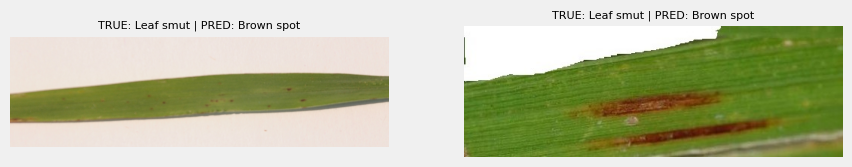

In [ ]:
# plot images that were wrongly predicted by a model

plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

<Figure size 2000x1500 with 0 Axes>

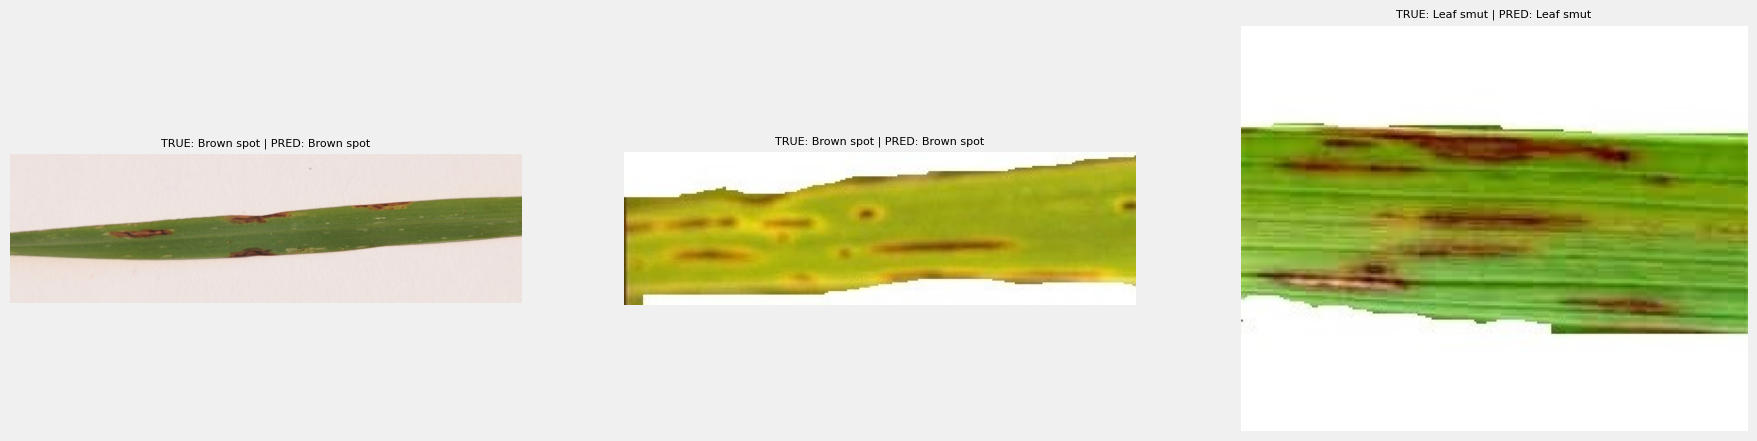

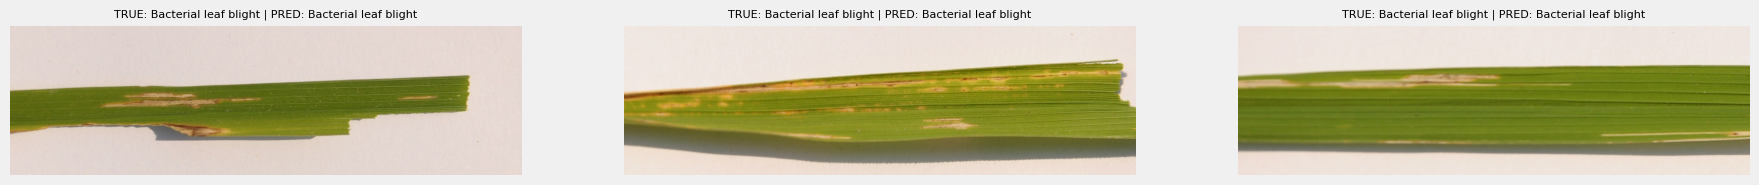

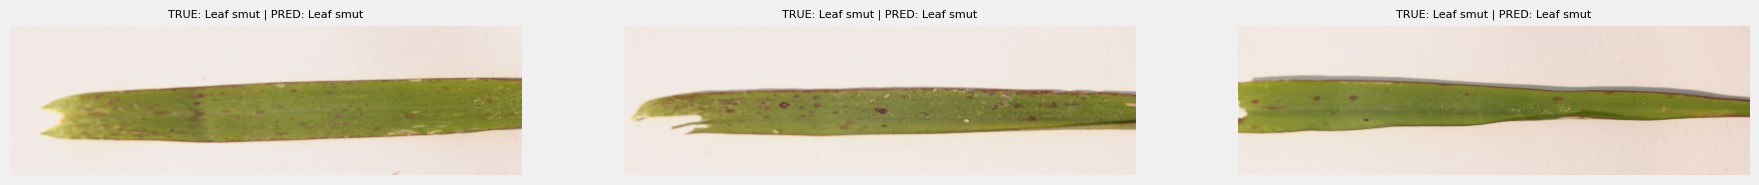

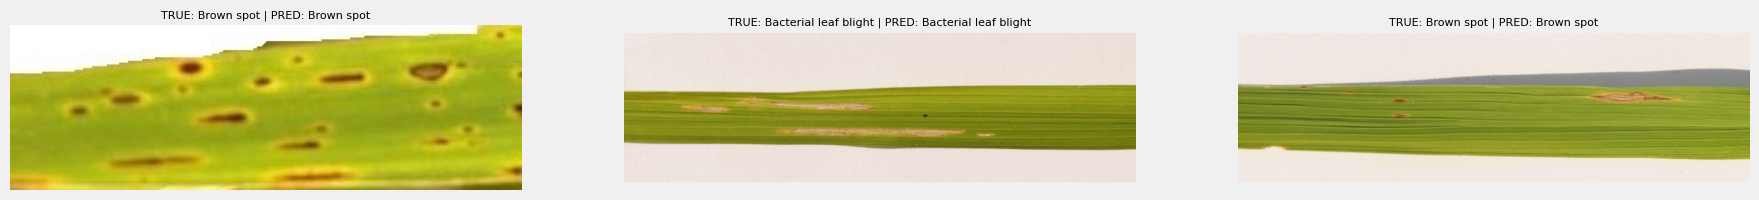

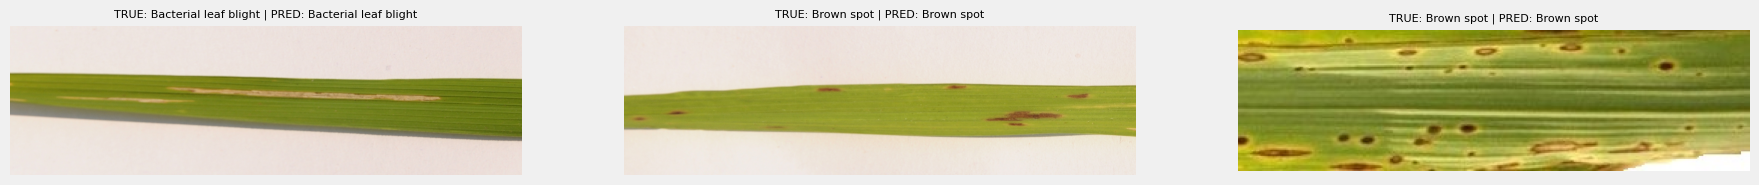

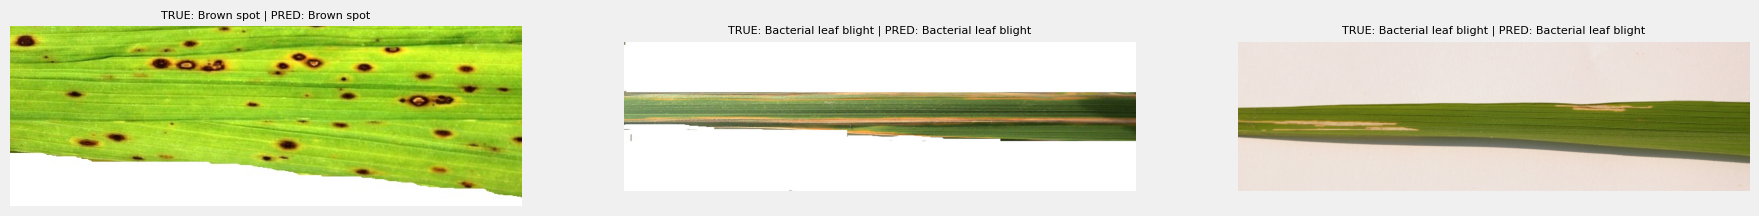

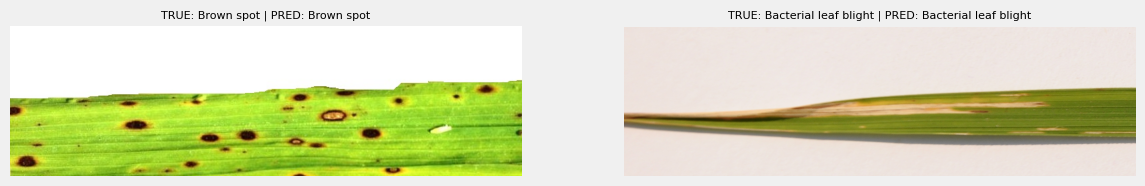

In [ ]:
# plot images that were correctly predicted by a model

plt.figure(figsize=(20, 15))  # Adjust the figure size
for i, row in Predictions[Predictions["Test Labels"] == Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    if i % 3 == 0:  # Start a new row every 3 images
        plt.figure(figsize=(20, 5))  # Adjust the figure size for each row
    plt.subplot(1, 3, i % 3 + 1)  # Use 1 row and 3 columns for each row
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

# Confusion Matrix

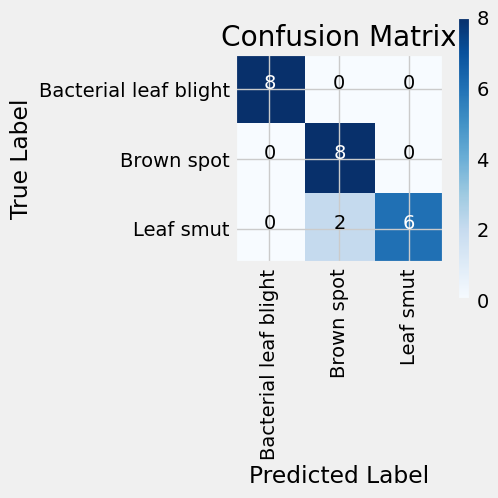

In [ ]:
preds = model.predict_generator(valid_images)
y_pred = np.argmax(preds, axis=1)
g_dict = valid_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(valid_images.classes, y_pred)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes, rotation=0)  # Rotate the y-axis labels 90 degrees

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Prediction on Test images

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Load and preprocess an image for prediction
img_path = '/content/rice_leaf_diseases/Brown spot/DSC_0105.jpg'
img = load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed

# Convert the image to an array and preprocess it
img_array = img_to_array(img)
img_array = preprocess_input(img_array)  # Preprocess the image according to EfficientNet B5 requirements

# Now, you can use this prepared image as 'your_input_data'
predictions = model.predict(np.expand_dims(img_array, axis=0))
predictions

1/1 [==============================] - 0s 21ms/step


array([[0.e+00, 1.e+00, 6.e-08]], dtype=float16)

In [ ]:
# Assuming predictions is your array
highest_probability_index = np.argmax(predictions)
highest_probability = predictions[0][highest_probability_index]

print(f"The highest probability is {highest_probability:.2f} for class index {highest_probability_index}")
print(f"The label is {classes[highest_probability_index]} ")

The highest probability is 1.00 for class index 1
The label is Brown spot 


**Report on Challenges faced**
* Analysing ImageDataGenerator
* Training of model takes more time.
* Splitting the data correctly into training and testing.
* Evaluating the Model.

Conclusion
We have achieved an Accuracy of 91.67% for our model using vgg16.
